## 2-5. CART(Classification and Regression Tree)

### 🌳의사결정나무(Decision Tree) 알고리즘
- 의사결정규칙(Decision Rule)을 도표화하여 관심 대장이 되는 집단을 소집단으로 분류(classification)하거나 예측(prediction)
- 데이터 마이닝 기법 중 하나
- 각 자료 내에 존재하는 관계와 규칙을 탐색하고 찾아내어 모형화
- 반복적으로 분류 규칙을 생성하여 가장 효과적인 분류 규칙 조합 완성
- 의사 결정 규칙을 나무 구조(Tree Structure)로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측 수행


#### Cart의 목적: Regursive binary splits that minimize the impurity of child nodes(불순도를 이용하여 binary split을 수행하는 알고리즘)

### 1. regression tree
- RSS를 가장 작게 만드는 변수를 기준으로 split을 선택하여 tree growing


### (1) import dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
#import dataset
mydata=datasets.load_diabetes()
mydata.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

### (2) data preprocessing

In [5]:
# 내장 데이터를 mydata로
df=pd.DataFrame(mydata['data'], columns=mydata['feature_names'])
# target column 추가
df['diabetes_score']=mydata['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [11]:
# X, Y split
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [12]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [13]:
Y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: diabetes_score, dtype: float64

### (3) model fitting

In [17]:
from sklearn.tree import DecisionTreeRegressor

#CART Algorithm for regression
myrt=DecisionTreeRegressor(max_depth=3)
myrt.fit(X,Y)

DecisionTreeRegressor(max_depth=3)

### (4) Test model

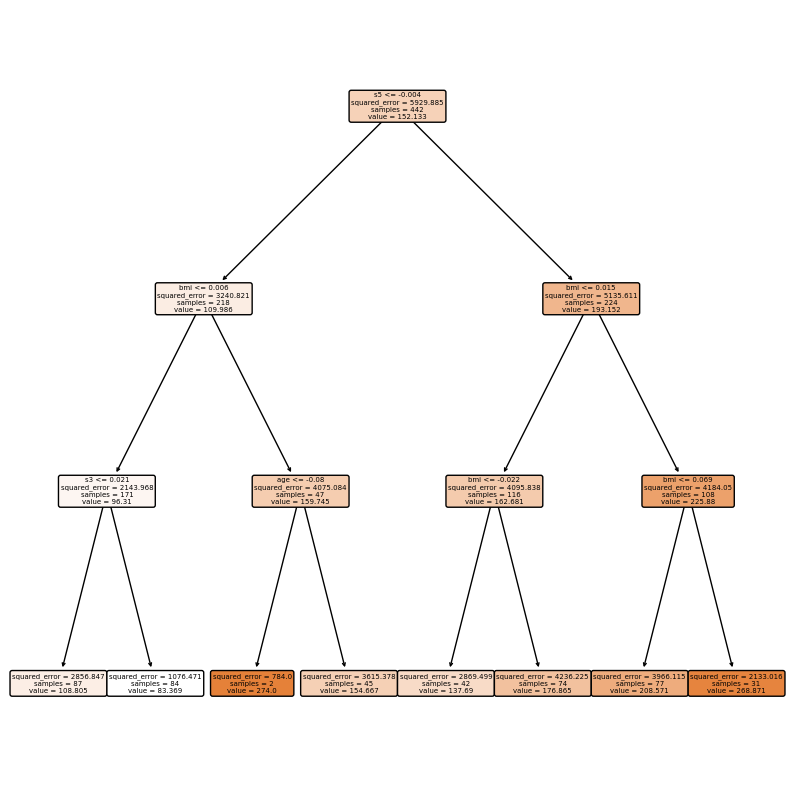

In [18]:
from sklearn import tree

#Decision Tree visualization
fig=plt.figure(figsize=(10,10))
_=tree.plot_tree(myrt, feature_names=df.columns[0:10], impurity=True, rounded=True, filled=True)

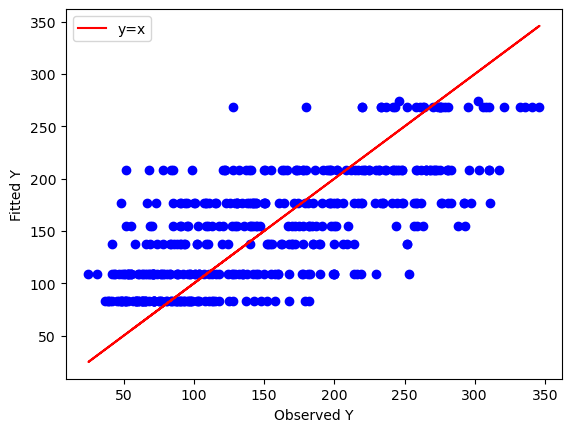

In [20]:
# Observation vs fitted 그리기
import matplotlib.pyplot as plt
plt.scatter(Y, myrt.predict(X), color='b')
plt.plot(Y, Y, color='r', label='y=x')
plt.xlabel('Observed Y')
plt.ylabel('Fitted Y')
plt.legend()
plt.show()

In [22]:
# R-squared
from sklearn.metrics import r2_score
print(round(r2_score(Y, myrt.predict(X)),3))

0.501


### 2. classification tree
- Voting: 완성된 tree에서 마지막 child node의 예측값은 Y의 majority class를 선택

### (1) import dataset

In [3]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
# import dataset
mydata = pd.read_csv("https://raw.githubusercontent.com/yohanesgultom/machine-learning-assignment/master/playtennis.data")
mydata.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### (2) data preprocessing

In [4]:
# One-Hot Encoding
mydf=pd.DataFrame(data=mydata)

In [5]:
mydf=pd.get_dummies(data=mydf, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'], prefix=['Outlook', 'Temperature', 'Humidity', 'Wind'])

In [9]:
# Label Encoding
encoder=LabelEncoder()
mydf['PlayTennis']=encoder.fit_transform(mydf['PlayTennis'])

In [10]:
mydf.head()

,PlayTennis,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,df_y
0,0,0,0,1,0,1,0,1,0,0,1,0
1,0,0,0,1,0,1,0,1,0,1,0,0
2,1,1,0,0,0,1,0,1,0,0,1,1
3,1,0,1,0,0,0,1,1,0,0,1,1
4,1,0,1,0,1,0,0,0,1,0,1,1


In [11]:
#X, y split
X=mydf.iloc[:, 1:]
y=mydf.iloc[:,0]

In [12]:
X

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,df_y
0,0,0,1,0,1,0,1,0,0,1,0
1,0,0,1,0,1,0,1,0,1,0,0
2,1,0,0,0,1,0,1,0,0,1,1
3,0,1,0,0,0,1,1,0,0,1,1
4,0,1,0,1,0,0,0,1,0,1,1
5,0,1,0,1,0,0,0,1,1,0,0
6,1,0,0,1,0,0,0,1,1,0,1
7,0,0,1,0,0,1,1,0,0,1,0
8,0,0,1,1,0,0,0,1,0,1,1
9,0,1,0,0,0,1,0,1,0,1,1


In [13]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: PlayTennis, dtype: int32

### (3) model fitting

In [14]:
# CART
cart=DecisionTreeClassifier(criterion='gini', random_state=0)
cart.fit(X, y)

DecisionTreeClassifier(random_state=0)

### (4) Test model

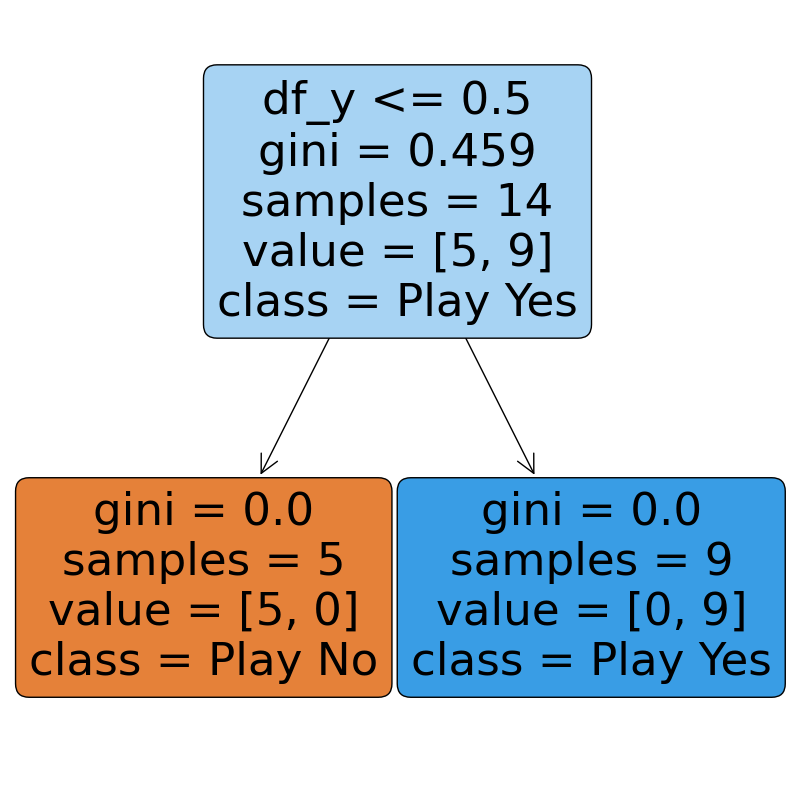

In [15]:
# Decision Tree visualization
fig = plt.figure(figsize = (10, 10))
_=tree.plot_tree(cart, feature_names = mydf.columns[1:], class_names = np.array(['Play No', 'Play Yes']),impurity = True,rounded = True,filled = True)

In [17]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
mtx=confusion_matrix(y, cart.predict(X))
mtx

array([[5, 0],
       [0, 9]], dtype=int64)

In [18]:
# Accuracy
from sklearn.metrics import accuracy_score
print(1-accuracy_score(y, cart.predict(X)))

0.0
